In [1]:
import xarray as xr # typically alias with xr

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # Cartopy map projections
from matplotlib import cm # Colormap from matplotlib

In [2]:
# You download this by running Xarray Data Structures notebook (changing downloading lines potentially if 
# using something other than urllib)

# Example data array: of air temperatures
da = xr.open_dataarray('air.mon.mean.nc')

In [3]:
# Example dataset: of land-surface characteristics - cool! 
ds = xr.open_dataset('GLDAS_NOAH025_M_EP.A202010.021.nc4')

## INITIAL DATA PROCESSING

###  CAVEAT: ALWAYS, ALWAYS, ALWAYS CAREFULLY EXAMINE YOUR METADATA
   - units
   - scaling
   - missing data value
   - dimensions
   - coordinates, e.g.,
     - what order?
     - is longitude 0 to 360 or -180 to 180?

### (1)  decoding time (later lesson)
  - *decode_times = True* option when reading in file
   - whether you want to decode times from file datetime format into datetime objects 

###  (2) dropping variables
  - *drop_var = var or list of vars* option when reading in file
  - if there are 'bad'/problematic variables you want to not even load into your data structure!

### (3) handling variables that are scaled and/or have fill values
  - *mask_and_scale=True* option when reading in file
     - if your variable attributes contain '_FillValue', will set all values = _FillValue to missing
     - if your variable attributes include information on 'scale' or 'add_offset' - will do so accordingly
      
### (4) renaming a variable
- *ds.rename_vars(name_dict='orig_name':'new_name')*

In [4]:
ds = ds.rename_vars(name_dict={'Albedo_inst':'albedo'})

### (5) identifying and handling missing values
- functionality very similar to Pandas!
<br><br>
- example of NaN identification:

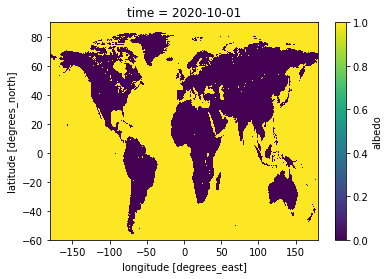

In [5]:
# Missing values over ocean - only have albedo estimates over land in this dataset
# In this plot, 1 is True (yes NaN), 0 is False (not NaN)

# We could actually use this as a land-sea mask!
ds['albedo'].isnull().plot()

- in this example, we don't want to fill in missing values....as they are missing for a reason
<br><br>
- but if we had a different data set and wanted to fill in our missing values:
<br><br>

**fill in a specific value**: *da.fillna(value to fill all missing values in array with)*
<br><br>

**fill in via forward propagating values**: *da.ffill(dim to propagate along, n)* ; if there is a gap of more than 'n' consecutive values, don't fill in NaN! 
<br><br>

**fill in via backward propagating values**: *da.bfill(dim to propagate along, n)*